In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('D:/DataScience-master/dataSetsAndProgML/DataSets/data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
def confusion_matrix(yActual,yPredicted):
    
    true_possitive = sum((yActual==1)&(yPredicted==1))
    true_negative = sum((yActual==0)&(yPredicted==0))
    false_possitive = sum((yActual==0)&(yPredicted==1))
    false_negative = sum((yActual==1)&(yPredicted==0))
    
    
    return true_possitive,true_negative,false_possitive,false_negative

In [4]:
X = df.drop(['Class'],axis=1)
y = df['Class'].copy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [40]:
X_train.shape

(190820, 30)

In [41]:
X_test.shape

(93987, 30)

In [42]:
# Below you can see that the class is highly imbalance as seeing the count of zeros and ones.
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

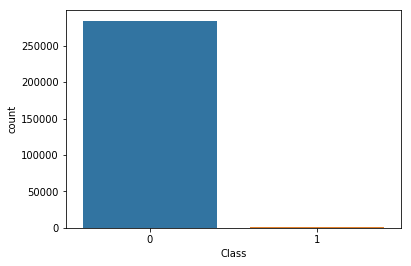

In [43]:
sns.countplot(y)  

In [44]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train,y_train)
y_pred = logisticRegression.predict(X_test)

In [45]:
logisticRegression.score(X_train,y_train)

0.9986793837123992

In [46]:
true_possitive,true_negative,false_possitive,false_negative = confusion_matrix(y_test,y_pred)

accuracy = (true_possitive + true_negative)/(true_possitive + true_negative + false_possitive + false_negative)
print('Accuracy  = ',accuracy)

precision = (true_possitive)/(true_possitive +false_possitive)
print('Precsion = ',precision)

recall = (true_possitive)/(true_possitive +false_negative)
print('Recall  = ',recall)

f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score  = ',f1_score)

Accuracy  =  0.9987657867577431
Precsion =  0.6513761467889908
Recall  =  0.47651006711409394
F1 score  =  0.5503875968992248


In [47]:
confusion_matrix(y_test, y_pred)

(71, 93800, 38, 78)

In [48]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93838
          1       0.65      0.48      0.55       149

avg / total       1.00      1.00      1.00     93987



Auc Roc score =  0.7380525569484236
FPR =  [0.00000000e+00 4.04953217e-04 1.00000000e+00]
TPR =  [0.         0.47651007 1.        ]


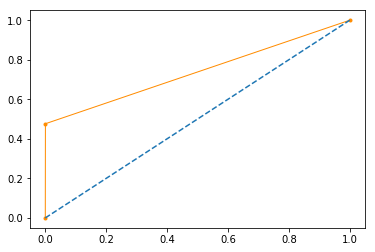

In [55]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print ('Auc Roc score = ',roc_auc)
print ("FPR = ",fpr)
print ("TPR = ",tpr)

plt.plot(fpr, tpr, marker='.',color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')


In [49]:
pd.crosstab(pd.Series(y_pred,name='Predicted'),
           pd.Series(y_test,name='Actual'))

Actual,0,1
Predicted,,
0,30752,63
1,34,0
